In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Puliamo il file Comuni

comuni_raw = pd.read_csv('./Materiali/Comuni_python.csv',delimiter=';',skiprows=7).iloc[:-1]

#Togliamo le colonne vuota(solo 1 in questo caso)
#comuni= comuni.dropna(how='all',axis='columns')
comuni = comuni_raw.drop(['Unnamed: 1'],axis=1)

#Togliamo le righe vuote e i duplicati
comuni= comuni.dropna(how='all')
comuni = comuni.drop_duplicates()

#Sistemiamo la colonna Regioni 
comuni['Regione'] =comuni['Regione'].str.title()

#Trasformiamo la colonna Regioni in num int
comuni['Popolazione2011'] = comuni['Popolazione2011'].astype(int)

print(comuni)

In [37]:
comuni.to_csv("comuni_python_cleaned.csv")

In [ ]:
#Puliamo il file province

province_raw=pd.read_csv('./Materiali/covid19_italy_province _python.csv')

#Puliamo le colonne
province= province_raw.dropna(how='all')
province = province.drop_duplicates()

#Togliamo la colonna SNo
province = province.drop(['SNo'],axis=1)

#Togliamo l'orario nella colonna Date
province['Date'] = pd.to_datetime(province['Date'])
province['Date'] = province['Date'].dt.date


print(province)



In [ ]:
#Puliamo il file regioni

region_raw=pd.read_csv('./Materiali/covid19_italy_region _python.csv')

#Puliamo le colonne
region= region_raw.dropna(how='all')
region = region.drop_duplicates()

#Togliamo la colonna SNo
region = region.drop(['SNo'],axis=1)

#Togliamo l'orario nella colonna Date
region['Date'] = pd.to_datetime(region['Date'])
region['Date'] = region['Date'].dt.date

region = region.fillna(0)

# Converti la colonna "TestsPerformed" da float a int
region['TestsPerformed'] = region['TestsPerformed'].astype(int)
region["TotalPositiveCases"]=region['TotalPositiveCases'].astype(int)

print(region)

In [ ]:
print(region.describe())

               RegionName  Deaths  Recovered
8               Lombardia   23024     289706
13               Piemonte    6623     105127
4          Emilia-Romagna    6162      59432
20                 Veneto    4210      84235
17                Toscana    2867      76331
6                   Lazio    2622      33422
7                 Liguria    2521      40842
3                Campania    1990      62060
16                Sicilia    1759      29984
14                 Puglia    1712      16795
9                  Marche    1327      11008
5   Friuli Venezia Giulia    1035      19401
0                 Abruzzo     980      12206
12            P.A. Trento     691      13995
11           P.A. Bolzano     578      13862
15               Sardegna     531       8695
18                 Umbria     460      18619
2                Calabria     343       7533
19          Valle d'Aosta     333       5406
1              Basilicata     175       2397
10                 Molise     135       2438


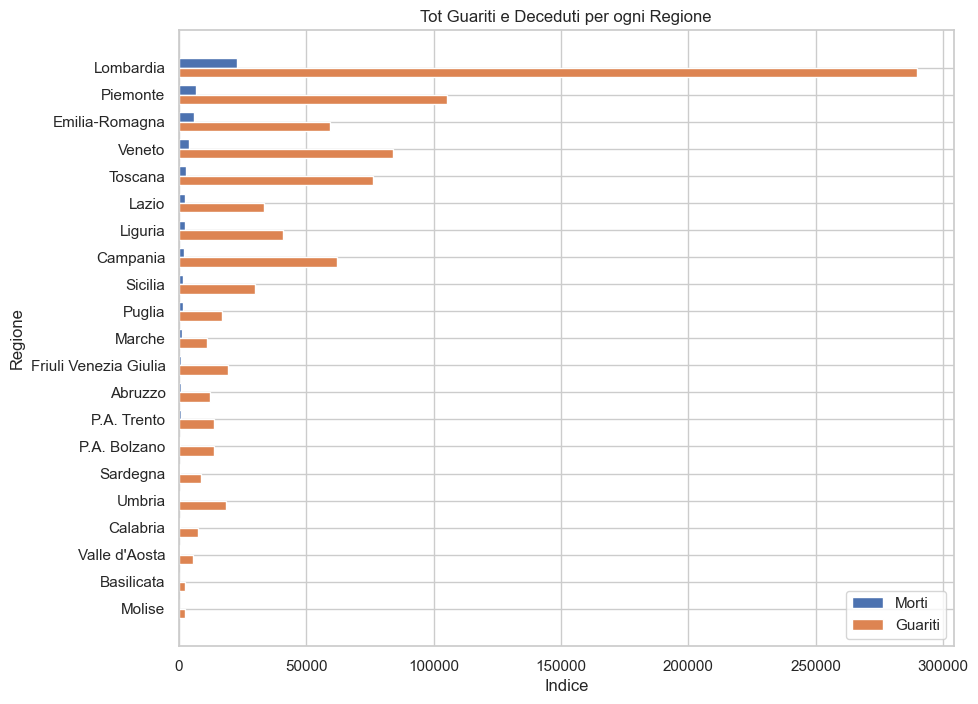

In [168]:
####### 1. Guariti e Deceduti per ogni regione:

# Filtra il DataFrame per la data '2020-12-06'
region['Date'] = pd.to_datetime(region['Date'])
df_selected_date = region[region['Date'] == '2020-12-06']

# Raggruppa per regione e calcola il totale dei decessi e dei guariti
group_by_region = df_selected_date.groupby("RegionName").agg({"Deaths":"sum", "Recovered":"sum"}).reset_index()

# Ordina i dati per numero totale di morti in ordine decrescente
group_by_region = group_by_region.sort_values(by='Deaths', ascending=False)

print(group_by_region[["RegionName","Deaths","Recovered"]])
# Plot dei morti e guariti per regione
plt.figure(figsize=(10, 8))  # Aumento delle dimensioni del grafico
bar_height = 0.35
index = range(len(group_by_region['RegionName']))
bars1 = plt.barh(index, group_by_region['Deaths'], bar_height, label='Morti')
bars2 = plt.barh([i + bar_height for i in index], group_by_region['Recovered'], bar_height, label='Guariti')

plt.ylabel('Regione')
plt.xlabel('Indice')
plt.title('Tot Guariti e Deceduti per ogni Regione')

# Inverti l'ordine degli elementi sull'asse y
plt.gca().invert_yaxis()

plt.yticks([i + bar_height / 2 for i in index], group_by_region['RegionName'])
plt.legend(loc='lower right')

plt.show()


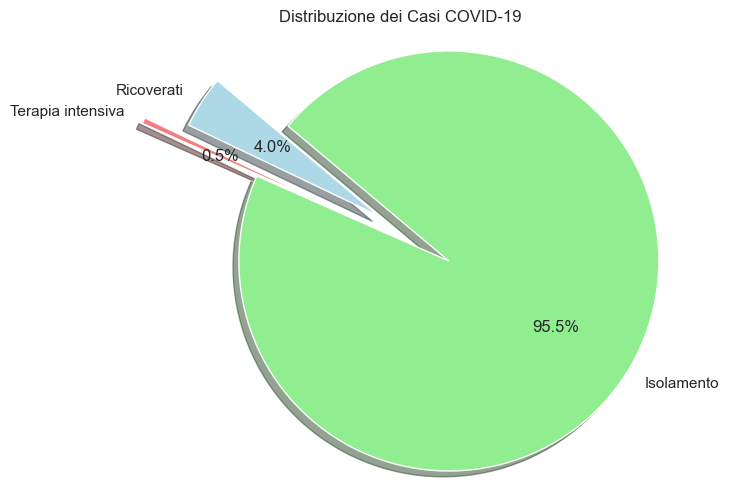

In [136]:
###### 2.Del totale TotalPositiveCases, vogliamo vedere quanti HospitalizedPatients,IntensiveCarePatients e HomeConfinement
# Filtra per la data desiderata (ultima data, che ci da un possibile il totale)

region['Date'] = pd.to_datetime(region['Date'])
df_selected_date = region[region['Date'] == '2020-12-06']
df_selected = df_selected_date[['HospitalizedPatients', 'IntensiveCarePatients', 'HomeConfinement']]
totals = df_selected.sum()
# Grafico a torta corrispondente
labels = ['Ricoverati', 'Terapia intensiva', 'Isolamento']
sizes = totals.values
colors=['lightblue', 'lightcoral', 'lightgreen']
explode = (0.4, 0.6, 0)  # Espandiamo la prima fetta (Hospitalized Patients)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.axis('equal')  # Garantisce che il grafico a torta sia disegnato come un cerchio
plt.title('Distribuzione dei Casi COVID-19')
plt.show()

C:\Users\lioss\AppData\Local\Temp\ipykernel_11608\105475789.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  OspedalizzatiStagionaliITA = region.resample("Q")["HospitalizedPatients"].mean()
C:\Users\lioss\AppData\Local\Temp\ipykernel_11608\105475789.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  TerapiaIntensivaStagionaliITA = region.resample("Q")["IntensiveCarePatients"].mean()
C:\Users\lioss\AppData\Local\Temp\ipykernel_11608\105475789.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ConfinatiACasaStagionaliITA = region.resample("Q")["HomeConfinement"].mean()


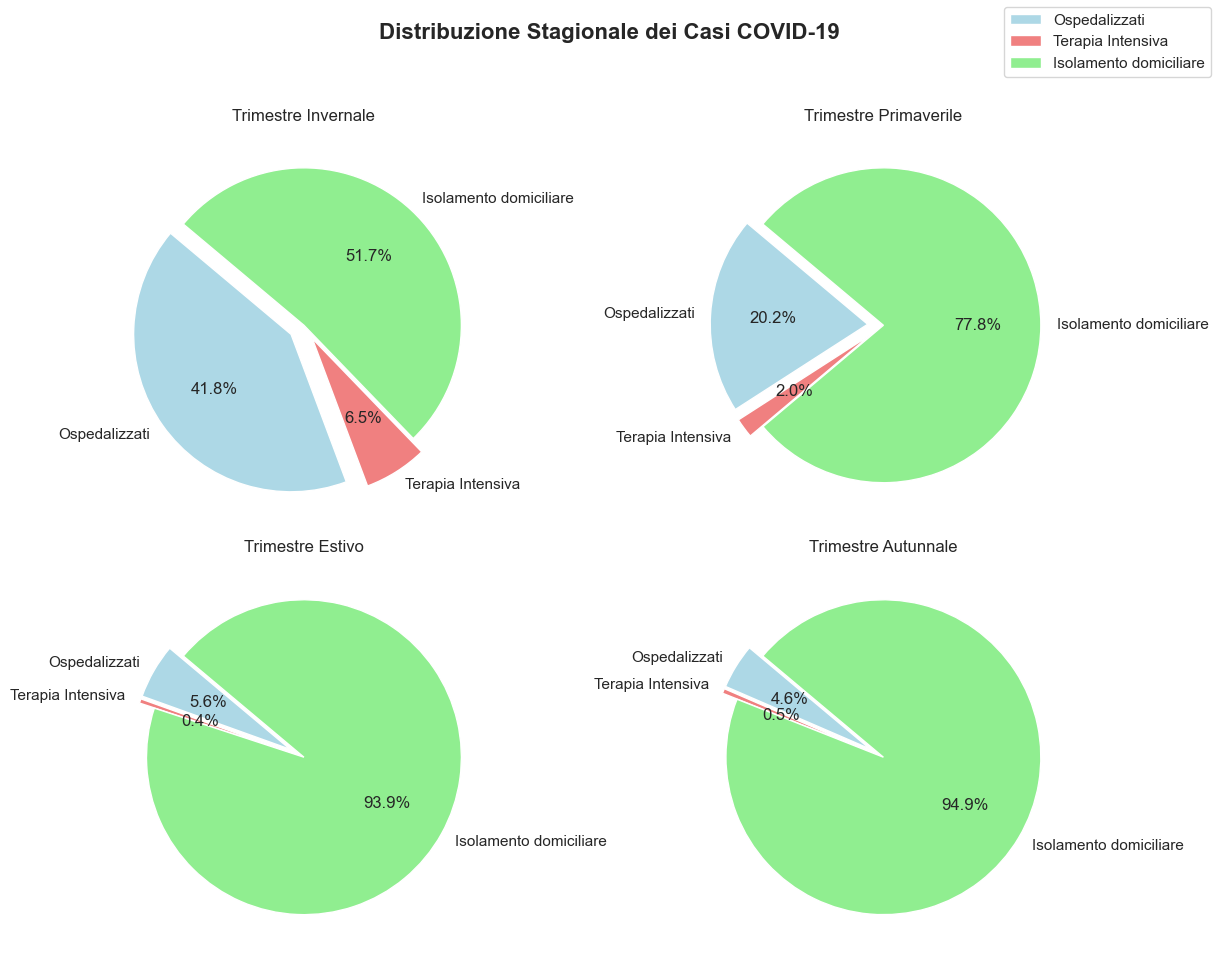

In [137]:
###### 3. Distribuzione stagionale dei casi COVID-19

region['Date'] = pd.to_datetime(region['Date'])
region.set_index('Date', inplace=True)
# Calcolo dei totali
OspedalizzatiTotITA = region["HospitalizedPatients"].sum()
TerapiaIntensivaTotITA = region["IntensiveCarePatients"].sum()
ConfinatiACasaTotITA =region["HomeConfinement"].sum()
# Calcolo dei totali stagionali
OspedalizzatiStagionaliITA = region.resample("Q")["HospitalizedPatients"].mean()
TerapiaIntensivaStagionaliITA = region.resample("Q")["IntensiveCarePatients"].mean()
ConfinatiACasaStagionaliITA = region.resample("Q")["HomeConfinement"].mean()


# Creazione di un DataFrame per i totali
PazientiPositivi = pd.DataFrame({
    'Ospedalizzati': [OspedalizzatiTotITA],
    'TerapiaIntensiva': [TerapiaIntensivaTotITA],
    'Isolamento domiciliare': [ConfinatiACasaTotITA]
}, index=['Total'])
# Creazione di un DataFrame per i totali stagionali
PazientiPositiviStagionali = pd.DataFrame({
    'Ospedalizzati': OspedalizzatiStagionaliITA,
    'Terapia Intensiva': TerapiaIntensivaStagionaliITA,
    'Isolamento domiciliare': ConfinatiACasaStagionaliITA
})
# Grafico a torta corrispondente
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(12, 10))
fig.suptitle('Distribuzione Stagionale dei Casi COVID-19', fontsize=16, fontweight='bold')


def annotate_pie(ax, labels, sizes,explode):
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'],explode=explode)
    

explode = (0.1, 0.1, 0)  # Espandi le prime due fette (Ospedalizzati e Terapia) rispetto a Isolamento

annotate_pie(ax1, PazientiPositiviStagionali.columns, PazientiPositiviStagionali.iloc[0],explode)
ax1.set_title('Trimestre Invernale')
annotate_pie(ax2, PazientiPositiviStagionali.columns, PazientiPositiviStagionali.iloc[1],explode)
ax2.set_title('Trimestre Primaverile')
annotate_pie(ax3, PazientiPositiviStagionali.columns, PazientiPositiviStagionali.iloc[2],explode)
ax3.set_title('Trimestre Estivo')
annotate_pie(ax4, PazientiPositiviStagionali.columns, PazientiPositiviStagionali.iloc[3],explode)
ax4.set_title('Trimestre Autunnale')



fig.legend(labels=PazientiPositiviStagionali.columns, loc='upper right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


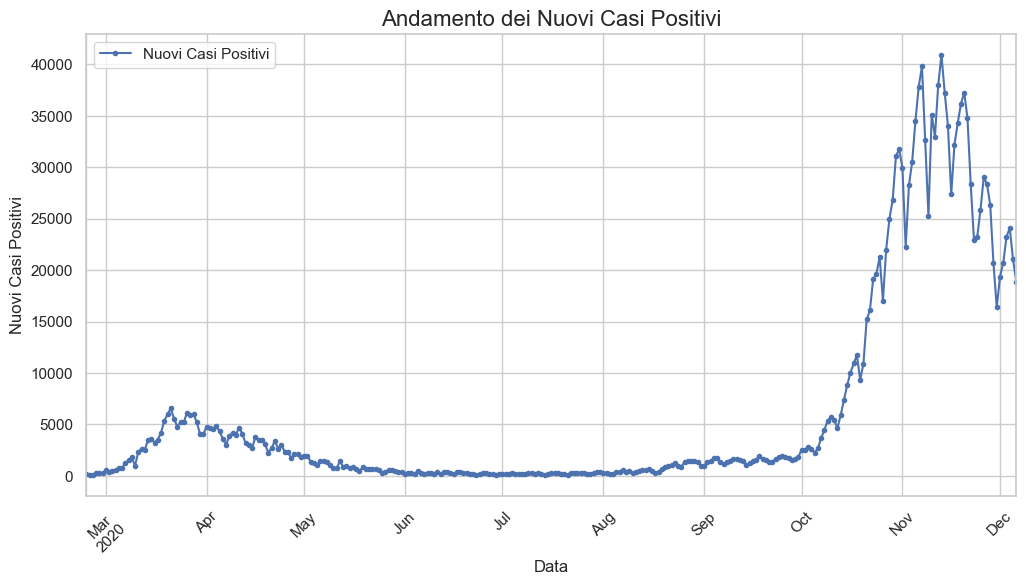

In [138]:
###### 4. Andamento mensile dei nuovi casi positivi
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
region.groupby('Date')['NewPositiveCases'].sum().plot(marker='.', linestyle='-', color='b', label='Nuovi Casi Positivi')
plt.title('Andamento dei Nuovi Casi Positivi', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi Casi Positivi', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

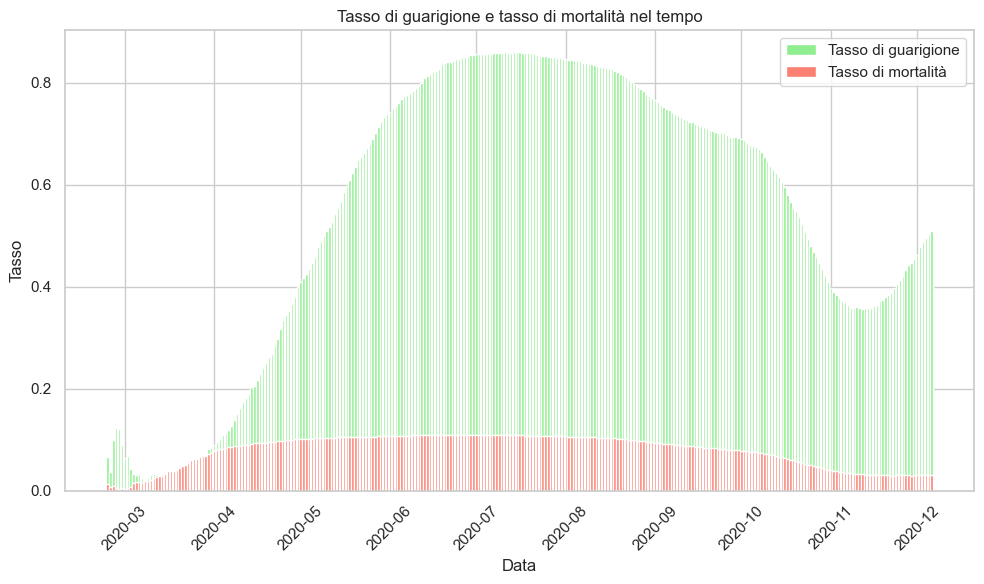

In [139]:
##### 5. Calcola il tasso di guarigione  e il tasso di mortalità nel tempo:

# Calcola il tasso di guarigione nel tempo
region['RecoveryRate'] = region['Recovered'] / region['TotalPositiveCases']
recovery_rate = region.groupby('Date')['RecoveryRate'].mean()

# Calcola il tasso di mortalità nel tempo
region['MortalityRate'] = region['Deaths'] / region['TotalPositiveCases']
mortality_rate = region.groupby('Date')['MortalityRate'].mean()

# Crea il grafico
plt.figure(figsize=(10, 6))

# Barre per il tasso di guarigione
plt.bar(recovery_rate.index, recovery_rate, label='Tasso di guarigione', color='lightgreen')

# Barre per il tasso di mortalità
plt.bar(mortality_rate.index, mortality_rate, label='Tasso di mortalità', color='salmon')

# Titolo e etichette degli assi
plt.title('Tasso di guarigione e tasso di mortalità nel tempo')
plt.xlabel('Data')
plt.ylabel('Tasso')

# Aggiungi una legenda
plt.legend()

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.show()




ProvinceName
Milano                   158717
Napoli                   102702
Roma                      96985
Torino                    94349
Varese                    45944
Monza e della Brianza     44603
Brescia                   36010
Treviso                   31952
Genova                    31864
Padova                    31073
Verona                    31020
Caserta                   30616
Firenze                   30331
Como                      29942
Vicenza                   29365
Name: TotalPositiveCases, dtype: int64


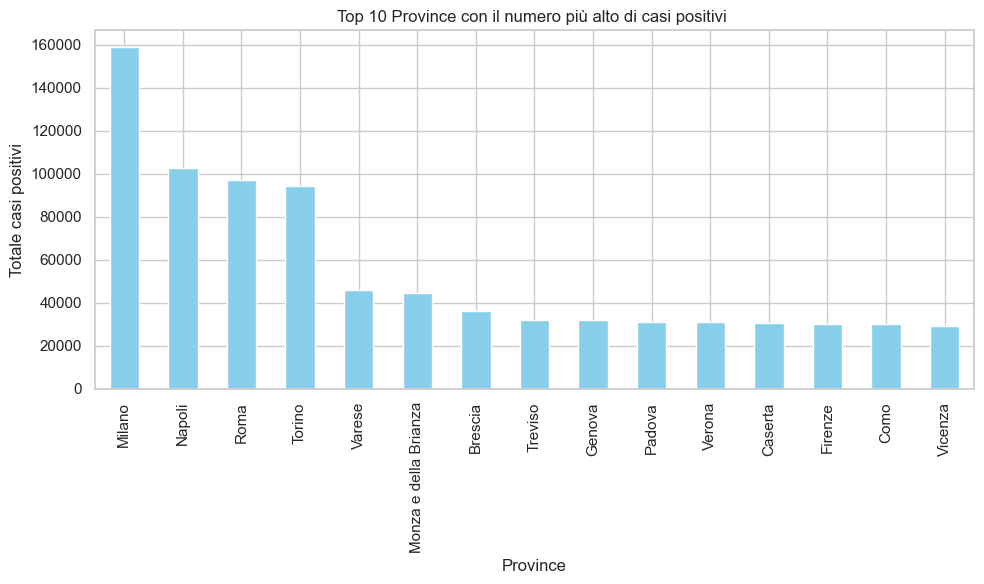

In [167]:
##### 6. Le prime 15 province con più positivi:

# Filtra il DataFrame per la data '2020-12-06'
province['Date'] = pd.to_datetime(province['Date'])
province_selected_date = province[province['Date'] == '2020-12-06']

# Raggruppa i dati per ProvinceName e calcola la somma dei TotalPositiveCases per ciascuna provincia
province_cases = province_selected_date.groupby('ProvinceName')['TotalPositiveCases'].sum()

# Ordina le province in base al numero totale di casi positivi in ordine decrescente
province_cases_sorted = province_cases.sort_values(ascending=False)

# Seleziona le prime 15 province con il numero più alto di casi positivi
top_15_province = province_cases_sorted.head(15)
print(top_15_province)
# Crea il grafico
plt.figure(figsize=(10, 6))

# Plot delle prime 15 province con il numero più alto di casi positivi
top_15_province.plot(kind='bar', color='skyblue')

# Titolo e etichette degli assi
plt.title('Top 10 Province con il numero più alto di casi positivi ')
plt.xlabel('Province')
plt.ylabel('Totale casi positivi')

# Mostra il grafico
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.tight_layout()
plt.show()




C:\Users\lioss\AppData\Local\Temp\ipykernel_11608\2441506152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lombardia_data['Date'] = pd.to_datetime(lombardia_data['Date'])


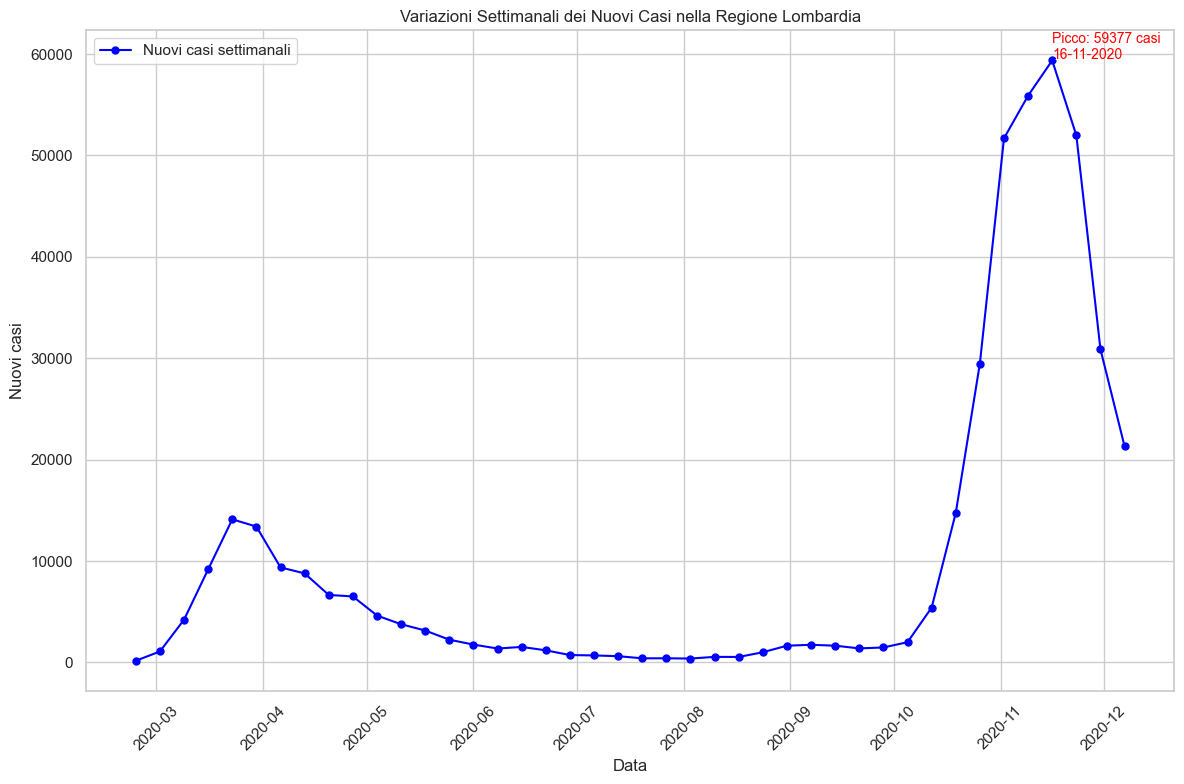

In [148]:
###### 7. Variazione settimanale dei nuovi casi per la regione Lombardia

#region['Date'] = pd.to_datetime(region['Date'])
#df_selected_date = region[region['Date'] == '2020-12-06']

lombardia_data = region[region['RegionName'] == 'Lombardia']
lombardia_data['Date'] = pd.to_datetime(lombardia_data['Date'])



weekly_new_cases = lombardia_data.groupby(pd.Grouper(key='Date', freq='W-Mon'))['NewPositiveCases'].sum().reset_index()
# Grafico corrispondente
plt.figure(figsize=(12, 8))
plt.plot(weekly_new_cases['Date'], weekly_new_cases['NewPositiveCases'], marker='o', markersize=5, color='blue', label='Nuovi casi settimanali')
plt.title('Variazioni Settimanali dei Nuovi Casi nella Regione Lombardia')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
# Aggiungi annotazioni, ad esempio la data con il picco massimo di nuovi casi
peak_date = weekly_new_cases.loc[weekly_new_cases['NewPositiveCases'].idxmax(), 'Date']
peak_cases = weekly_new_cases['NewPositiveCases'].max()
plt.annotate(f'Picco: {peak_cases} casi\n{peak_date.strftime("%d-%m-%Y")}',
             xy=(peak_date, peak_cases), xytext=(peak_date, peak_cases + 100),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, color='red')
plt.show()



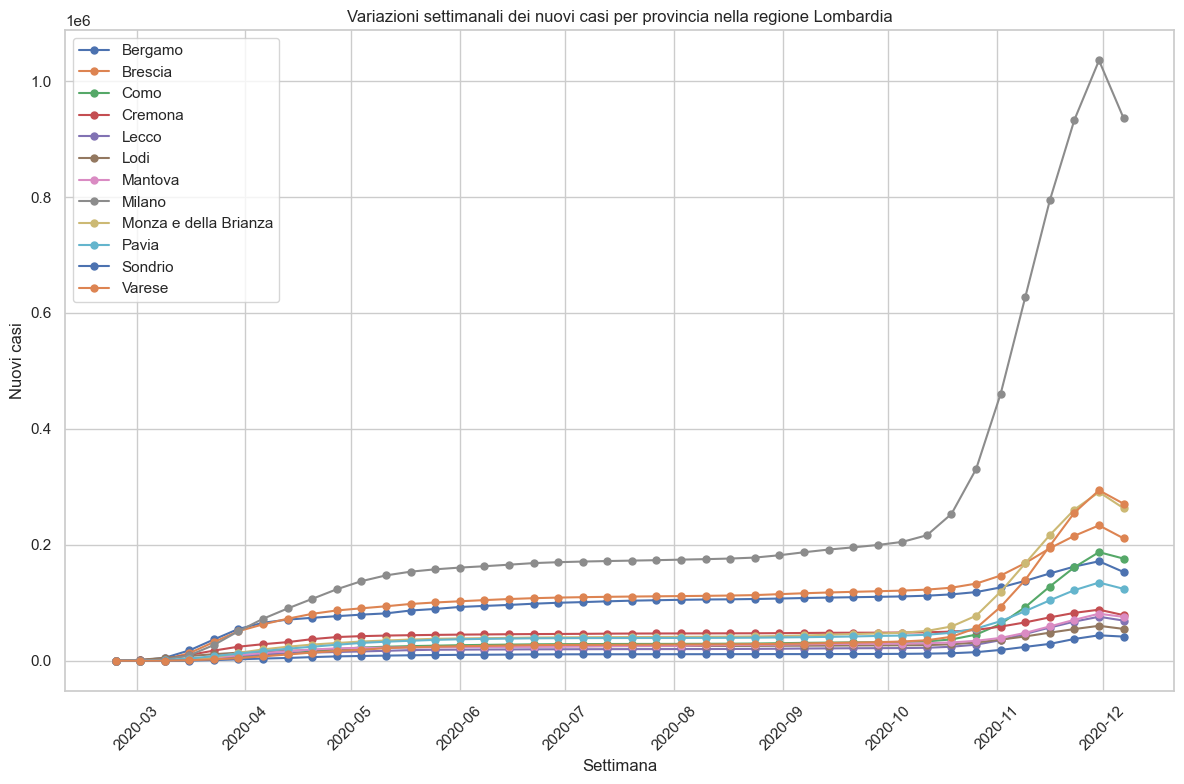

In [153]:
######## 8. La somma dei nuovi casi per ogni provincia della Lombardia:
# Filtra i dati solo per la regione Lombardia
lombardia_data = province[province['RegionName'] == 'Lombardia']
# Rimuovi le righe in cui ProvinceCode è uguale a 988 o 888
lombardia_data = lombardia_data.loc[~((lombardia_data['ProvinceCode'] == 988) | (lombardia_data['ProvinceCode'] == 888))]
# Resetta l'indice dopo la rimozione delle righe
lombardia_data = lombardia_data.reset_index(drop=True)
# Converte la colonna 'Date' in formato datetime
lombardia_data['Date'] = pd.to_datetime(lombardia_data['Date'])
# Raggruppa i dati per provincia e settimana, calcolando la somma dei nuovi casi per ogni settimana
weekly_new_cases_by_province = lombardia_data.groupby(['ProvinceName', pd.Grouper(key='Date', freq='W-Mon')])['TotalPositiveCases'].sum().reset_index()
# Crea un grafico per visualizzare le variazioni settimanali dei nuovi casi per ogni provincia
plt.figure(figsize=(12, 8))
# Itera attraverso le province e traccia i dati
for province, data in weekly_new_cases_by_province.groupby('ProvinceName'):
    plt.plot(data['Date'], data['TotalPositiveCases'], label=province, marker='o', markersize=5)
# Aggiungi la legenda, titolo e etichette degli assi
plt.legend()
plt.title('Variazioni settimanali dei nuovi casi per provincia nella regione Lombardia')
plt.xlabel('Settimana')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

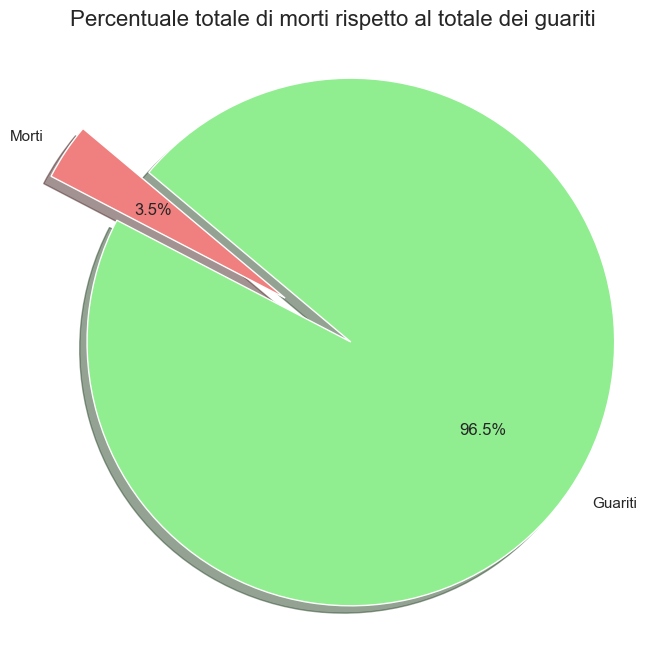

In [126]:
####### 9. Percentuale dei morti rispetto al totale dei casi positivi in Italia

# Filtra il DataFrame per la data '2020-12-06'
#region['Date'] = pd.to_datetime(region['Date'])
#df_selected_date = region[region['Date'] == '2020-12-06']

# Calcola la percentuale totale di morti rispetto ai casi positivi per la data selezionata
total_death_percentage = (df_selected_date['Deaths'].sum() / df_selected_date['TotalPositiveCases'].sum()) * 100

# Crea un DataFrame con i valori per il grafico a torta
data = {'Morti': total_death_percentage, 'Guariti': 100 - total_death_percentage}
df = pd.DataFrame(data, index=['Percentuale'])

# Crea il grafico a torta con uno stile migliorato
plt.figure(figsize=(8, 8))
colors = ['lightcoral', 'lightgreen']
explode = (0.3, 0)  # Evidenzia il segmento relativo ai decessi
plt.pie(df.iloc[0], labels=df.columns, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
plt.title('Percentuale totale di morti rispetto al totale dei guariti', fontsize=16)
plt.axis('equal')  # Garantisce che il grafico sia circolare
plt.show()


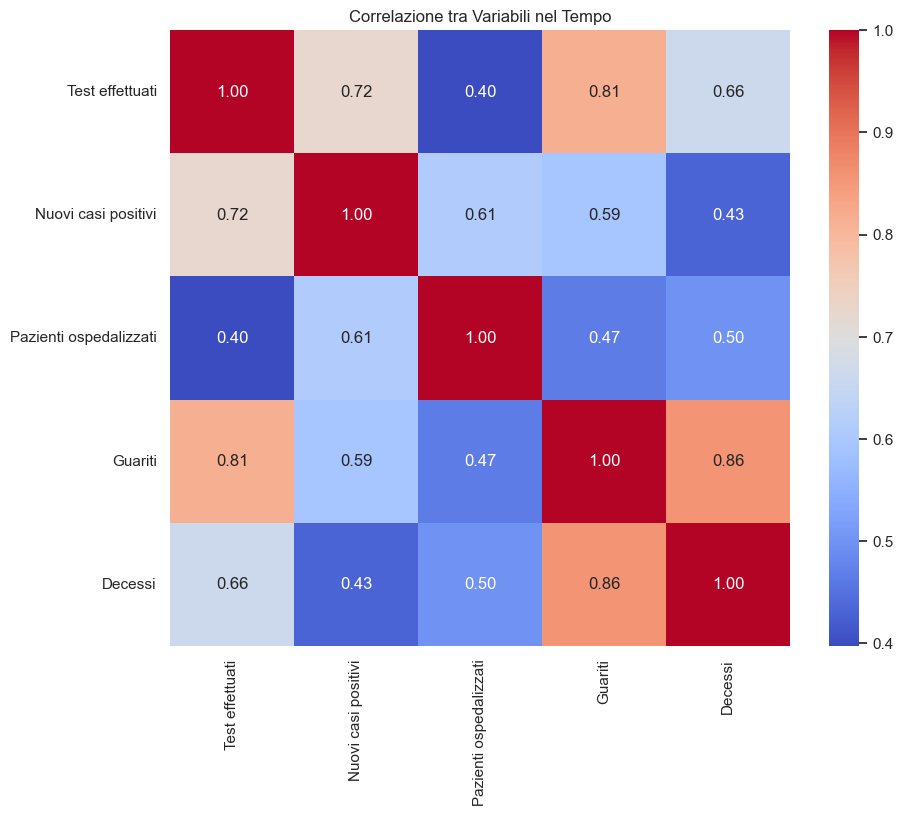

In [151]:
###### 10. Correlazione tra variabili nel tempo.

# Seleziona le colonne necessarie
data_for_correlation = region[['TestsPerformed', 'NewPositiveCases', 'HospitalizedPatients', 'Recovered', 'Deaths']]
# Calcola la matrice di correlazione
correlation_matrix = data_for_correlation.corr()
# Crea un heatmap della matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Test effettuati', 'Nuovi casi positivi', 'Pazienti ospedalizzati', 'Guariti', 'Decessi'], 
            yticklabels=['Test effettuati', 'Nuovi casi positivi', 'Pazienti ospedalizzati', 'Guariti', 'Decessi'])
# Impostazioni aggiuntive
plt.title('Correlazione tra Variabili nel Tempo')
plt.show()

In [ ]:
# -    POPOLAZIONE    -    Carichiamo il file EXCEL in un DataFrame
popolazione = pd.read_excel('C:/Users/lioss/OneDrive/Desktop/Python/Python_Module/BW/Materiali/Popolazione2020.xlsx',
                            skiprows=8,
                            names=["Regioni", "Maschi", "Femmine", "Totale"],
                            usecols=[0, 2, 3, 4]).iloc[:-1]
#print(popolazione)
# Converti le colonne da float a int
popolazione[['Maschi', 'Femmine', 'Totale']] = popolazione[['Maschi', 'Femmine', 'Totale']].astype(int)
#print(popolazione)

totale_popolazione = popolazione["Totale"].sum()
totale_maschi = popolazione["Maschi"].sum()
totale_femmine = popolazione["Femmine"].sum()
# Creazione di un grafico a torta
plt.figure(figsize=(8, 8))
sizes = [totale_maschi, totale_femmine]
labels = ['Maschi', 'Femmine']
colors = ['lightblue', 'pink']
explode = (0.1, 0)  # Esplosione della fetta 'Maschi'
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Totale della popolazione italiana per sesso (2020)', fontsize=16)
plt.axis('equal')  # Equalizza gli assi per rendere il grafico a torta circolare
total_text = f'Totale \n popolazione: \n {totale_popolazione}'
plt.figtext(0.9, 0.5, total_text, ha='center', va='center', fontsize=12, color='black')
plt.show()

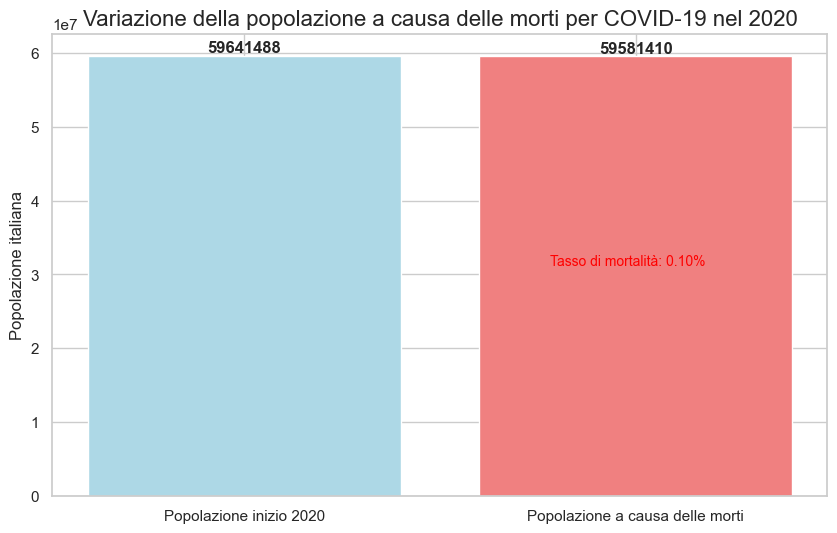

In [157]:
############## 11. Variazione della popolazione a causa delle morti per covid-19 nel

totale_popolazione = popolazione["Totale"].sum()
# Filtra il DataFrame regioni per la data '2020-12-06'
region['Date'] = pd.to_datetime(region['Date'])
totale_morti_regione_date = region[region['Date'] == '2020-12-06']
totale_morti = totale_morti_regione_date['Deaths'].sum()
# Calcola la differenza tra la popolazione totale all'inizio del 2020 e il totale dei morti per COVID-19
variazione_popol_causa_morti = totale_popolazione - totale_morti
# Crea un dizionario con i dati per il grafico a barre
data = {'Popolazione inizio 2020': totale_popolazione, 'Popolazione a causa delle morti': variazione_popol_causa_morti}
# Creazione di un grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(data.keys(), data.values(), color=['lightblue', 'lightcoral'])
plt.title('Variazione della popolazione a causa delle morti per COVID-19 nel 2020', fontsize=16)
plt.ylabel('Popolazione italiana')
# Aggiungi il valore numerico all'interno delle barre
for bar in bars:
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', fontweight='bold')
tasso_mortalita = (totale_morti / totale_popolazione) * 100
total_text = f'Tasso di mortalità: {tasso_mortalita:.2f}%'
plt.figtext(0.7, 0.5, total_text, ha='center', va='center', fontsize=10, color='red')
plt.show()



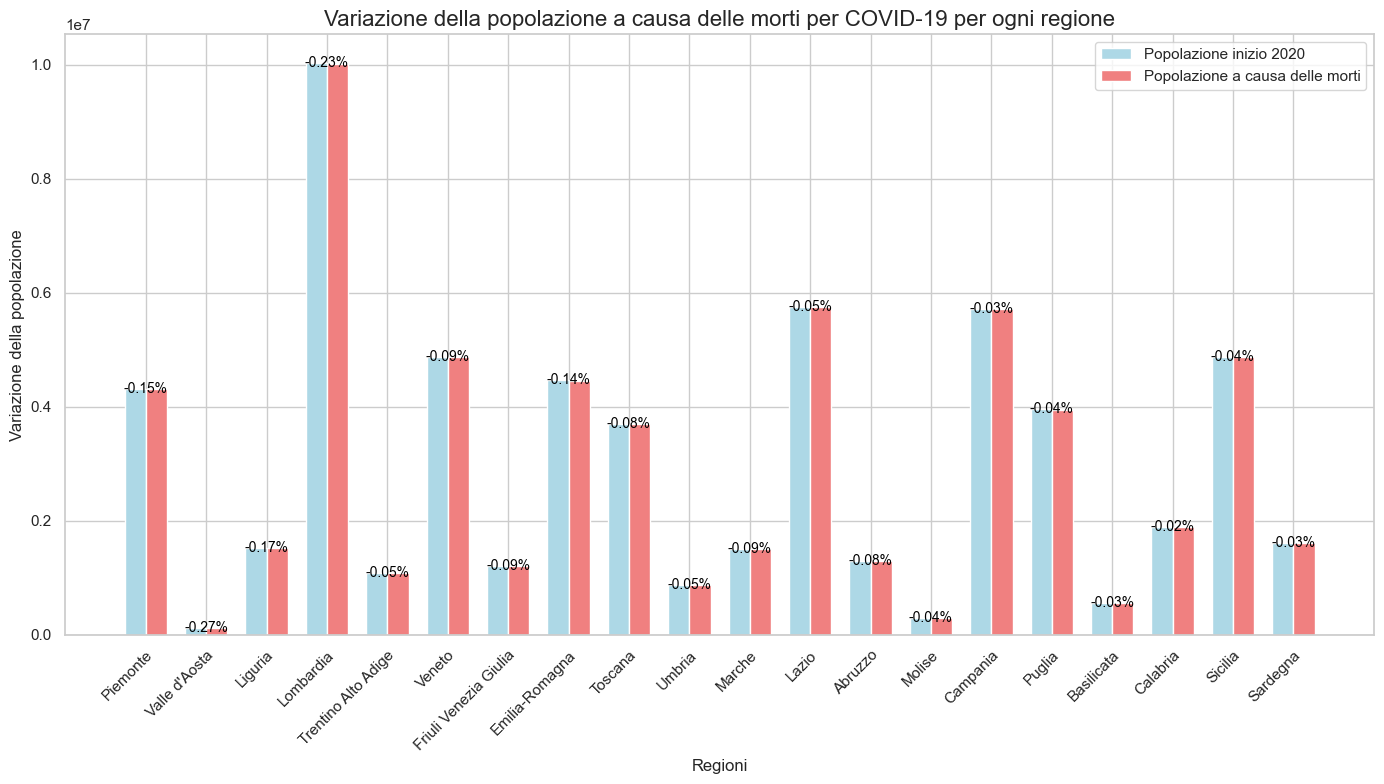

In [169]:
##### 12: Calcolo variazione popolazione divisa per regione da inizio 2020 a fine 2020 a causa delle morti per Covid

# Rimuovi spazi aggiuntivi nei nomi delle regioni
popolazione['Regioni'] = popolazione['Regioni'].str.strip()
# Sostituisce i nomi di alcune regioni della colonna Regioni nel file popolazione
popolazione['Regioni'] = popolazione['Regioni'].replace({'Trentino Alto Adige / Südtirol': 'Trentino Alto Adige',
                                                        "Valle d'Aosta / Vallée d'Aoste": "Valle d'Aosta",
                                                        'Friuli-Venezia Giulia': 'Friuli Venezia Giulia'})
# Sostituisce i nomi di alcune regioni della colonna Regioni nel file regioni
region['RegionName'] = region['RegionName'].replace({'P.A. Bolzano': 'Trentino Alto Adige',
                                                      "P.A. Trento": "Trentino Alto Adige"})
# Filtra il DataFrame regioni per la data '2020-12-06'
region['Date'] = pd.to_datetime(region['Date'])
totale_morti_regione_date = region[region['Date'] == '2020-12-06']
# Creare un dizionario vuoto per contenere i dati
data = {'Regioni': [], 'Popolazione inizio 2020': [], 'Popolazione a causa delle morti': []}
# Iterare sul DataFrame 'popolazione' per ottenere le informazioni di ogni regione
for idx, reg in popolazione.iterrows():
   regione = reg['Regioni']
   tot_popol_regione = reg['Totale']
   # Ottieni il totale dei morti per la regione corrispondente alla data specifica
   tot_morti_regione = totale_morti_regione_date[totale_morti_regione_date['RegionName'] == regione.strip()]['Deaths'].values[0]
  
   # Aggiungi i dati al dizionario
   data['Regioni'].append(regione)
   data['Popolazione inizio 2020'].append(tot_popol_regione)
   data['Popolazione a causa delle morti'].append(tot_popol_regione - tot_morti_regione)
# Creazione di un DataFrame dai dati
df_data = pd.DataFrame(data)
# Creazione di un grafico a barre per ogni regione con la variazione percentuale
plt.figure(figsize=(14, 8))
bar_width = 0.35
bar1 = plt.bar(df_data.index, df_data['Popolazione inizio 2020'], width=bar_width, label='Popolazione inizio 2020', color='lightblue')
bar2 = plt.bar(df_data.index + bar_width, df_data['Popolazione a causa delle morti'], width=bar_width, label='Popolazione a causa delle morti', color='lightcoral')
# Aggiungi la variazione percentuale come testo nel grafico
for i, (pop_inizio, pop_morti) in enumerate(zip(df_data['Popolazione inizio 2020'], df_data['Popolazione a causa delle morti'])):
   plt.text(i + bar_width / 2, max(pop_inizio, pop_morti) + 10, f'{((pop_morti - pop_inizio) / pop_inizio) * 100:.2f}%', ha='center', va='center', fontsize=10, color='black')
plt.title('Variazione della popolazione a causa delle morti per COVID-19 per ogni regione', fontsize=16)
plt.xlabel('Regioni')
plt.ylabel('Variazione della popolazione')
plt.xticks(df_data.index + bar_width/2, df_data['Regioni'], rotation=45, ha='right', rotation_mode='anchor')  # Posiziona le etichette sull'asse x
plt.legend()
plt.tight_layout() 
plt.show()
